In [3]:
#The objective of this project is predict the number of bikes which will be used for day based in some variables.
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [4]:
data = pd.read_csv('day.csv')

In [5]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [6]:
data.describe().round(2)

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.00,731.00,731.0,731.00,731.00,731.0,731.00,731.00,731.00,731.00,731.00,731.00,731.00,731.00,731.00
mean,366.00,2.50,0.5,6.52,0.03,3.0,0.68,1.40,0.50,0.47,0.63,0.19,848.18,3656.17,4504.35
std,211.17,1.11,0.5,3.45,0.17,2.0,0.47,0.54,0.18,0.16,0.14,0.08,686.62,1560.26,1937.21
min,1.00,1.00,0.0,1.00,0.00,0.0,0.00,1.00,0.06,0.08,0.00,0.02,2.00,20.00,22.00
25%,183.50,2.00,0.0,4.00,0.00,1.0,0.00,1.00,0.34,0.34,0.52,0.13,315.50,2497.00,3152.00
50%,366.00,3.00,1.0,7.00,0.00,3.0,1.00,1.00,0.50,0.49,0.63,0.18,713.00,3662.00,4548.00
75%,548.50,3.00,1.0,10.00,0.00,5.0,1.00,2.00,0.66,0.61,0.73,0.23,1096.00,4776.50,5956.00
max,731.00,4.00,1.0,12.00,1.00,6.0,1.00,3.00,0.86,0.84,0.97,0.51,3410.00,6946.00,8714.00


In [7]:
#Here I check the correlation between the variables.
data.corr().round(4)

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.0000,0.4122,0.8660,0.4967,0.0161,-0.0000,-0.0043,-0.0215,0.1506,0.1526,0.0164,-0.1126,0.2753,0.6596,0.6288
season,0.4122,1.0000,-0.0018,0.8314,-0.0105,-0.0031,0.0125,0.0192,0.3343,0.3429,0.2054,-0.2290,0.2104,0.4116,0.4061
yr,0.8660,-0.0018,1.0000,-0.0018,0.0080,-0.0055,-0.0020,-0.0487,0.0476,0.0461,-0.1107,-0.0118,0.2485,0.5942,0.5667
mnth,0.4967,0.8314,-0.0018,1.0000,0.0192,0.0095,-0.0059,0.0435,0.2202,0.2275,0.2222,-0.2075,0.1230,0.2935,0.2800
holiday,0.0161,-0.0105,0.0080,0.0192,1.0000,-0.1020,-0.2530,-0.0346,-0.0286,-0.0325,-0.0159,0.0063,0.0543,-0.1087,-0.0683
weekday,-0.0000,-0.0031,-0.0055,0.0095,-0.1020,1.0000,0.0358,0.0311,-0.0002,-0.0075,-0.0522,0.0143,0.0599,0.0574,0.0674
workingday,-0.0043,0.0125,-0.0020,-0.0059,-0.2530,0.0358,1.0000,0.0612,0.0527,0.0522,0.0243,-0.0188,-0.5180,0.3039,0.0612
weathersit,-0.0215,0.0192,-0.0487,0.0435,-0.0346,0.0311,0.0612,1.0000,-0.1206,-0.1216,0.5910,0.0395,-0.2474,-0.2604,-0.2974
temp,0.1506,0.3343,0.0476,0.2202,-0.0286,-0.0002,0.0527,-0.1206,1.0000,0.9917,0.1270,-0.1579,0.5433,0.5400,0.6275
atemp,0.1526,0.3429,0.0461,0.2275,-0.0325,-0.0075,0.0522,-0.1216,0.9917,1.0000,0.1400,-0.1836,0.5439,0.5442,0.6311


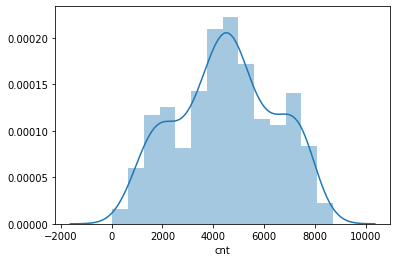

In [6]:
#Exploratory Work.
sns.distplot(data['cnt'])

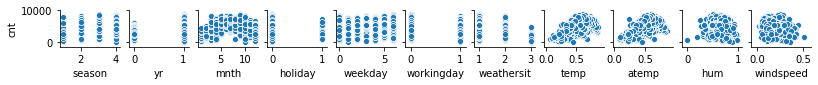

In [7]:
#Exploratory Work. So, here can see if the variables have a growth / decrease behavior similar to a line.
ax = sns.pairplot(data = data, y_vars = 'cnt', x_vars = ['season','yr','mnth','holiday','weekday','workingday','weathersit'
                                                         ,'temp','atemp','hum','windspeed'],height=1, aspect=1)
ax

In [8]:
#This is the variable i want predict.
y = data['cnt']

In [9]:
'''
Here, I set the variables that i will use to predict the value. 
I chose those because the correlaction between the variable 'cnt' is promising,
due to the graphics and their behavior that is similar to a line.
Note: The correlaction between the variable can't be big between themselves.
'''
X = data[['season','atemp','yr','windspeed','weathersit']]

In [10]:
#I create the data frames of train and test. The tests dataframes will have 20% of the size of the original data frame(data).
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 2811)

In [11]:
#I create this to have more estatical details.
X_train_with_constant = sm.add_constant(X_train)
model_statsmodels = sm.OLS(y_train, X_train_with_constant, hasconst = True).fit()

In [12]:
'''
Here, I see the behavior of my model. R² is almost 80%, that means, my model fits in the data. 
Since our value of Prob(F-statistic) is way below 0.01, we can reject the null hypothesis in favour of the alternative,
then, the model is statistically significant.
Note: Prob(F-statistic) is the p-value associated with the test of the significance of the overall model.
'''
print(model_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     426.8
Date:                Thu, 23 Apr 2020   Prob (F-statistic):          2.40e-191
Time:                        15:28:14   Log-Likelihood:                -4798.5
No. Observations:                 584   AIC:                             9609.
Df Residuals:                     578   BIC:                             9635.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1143.9391    207.907      5.502      0.0

In [13]:
model = LinearRegression()

In [14]:
#here i train the model.
model.fit(X = X_train, y = y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
#To confirm the value of R².
print("R² = {}".format(model.score(X_train,y_train).round(3)))

R² = 0.787


In [16]:
y_predicted = model.predict(X_test)

In [17]:
print("R² = %s" % metrics.r2_score(y_test,y_predicted).round(3))

R² = 0.764


In [18]:
y_predicted_train = model.predict(X_train)

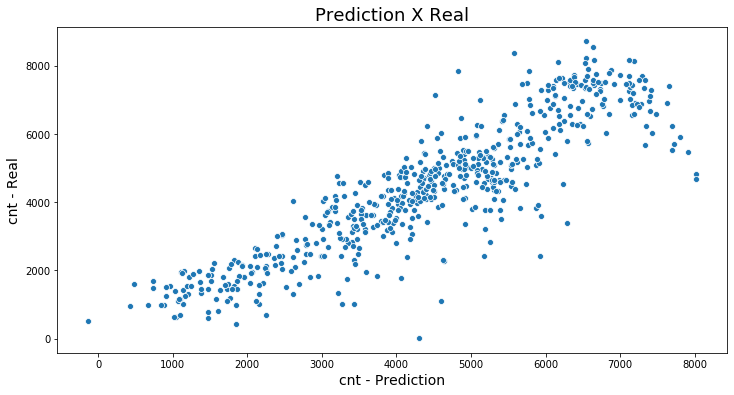

In [19]:
#So, how can we see isn't perfect, But its behavior is similar a line.
ax = sns.scatterplot(x=y_predicted_train, y=y_train)
ax.figure.set_size_inches(12, 6)
ax.set_title('Prediction X Real', fontsize=18)
ax.set_xlabel('cnt - Prediction', fontsize=14)
ax.set_ylabel('cnt - Real', fontsize=14)
ax

In [20]:
error = y_train - y_predicted_train

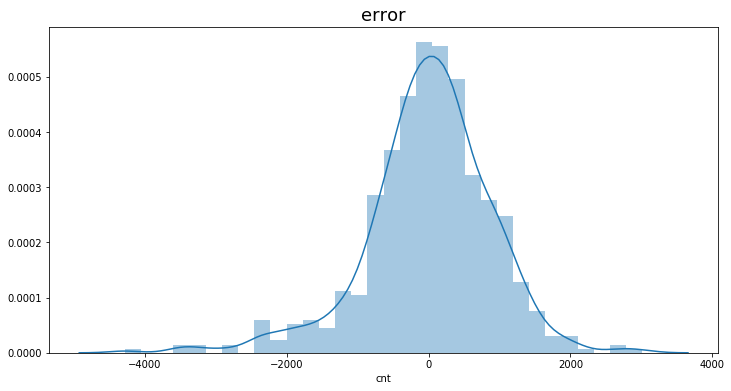

In [21]:
ax = sns.distplot(error)
ax.figure.set_size_inches(12, 6)
ax.set_title('error', fontsize=18)
ax

In [22]:
import pickle
output = open('Model_of_RL1', 'wb')
pickle.dump(model, output)
output.close()